# Visualizing the Transcription and Sentiment Analysis Result

This notebook will load ahd display the results of the processing of the audio recordings. First, make sure to have the latest versions of some required libraries.

In [6]:
!pip install -U matplotlib seaborn pandas

     |████████████████████████████████| 11.6 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 283 kB 45.4 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Load the Data

The first step is to load the picke file generated at the end of the processing notebook.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('../data/results/transcription.pickle')
df

,transcript,recording,index,speaker,pred_sent,speech,positive,negative,mixed,neutral
0,dpv-cc1600045852-013.json,01742a57-8b54-4ca8-8412-fc62379d83b5.wav,0,ch_0,NEUTRAL,Montag ein Gruner-und-Jahr-Kundenservice. Mein...,0.043228,0.002228,4.782476e-06,0.954539
1,dpv-cc1600045852-013.json,01742a57-8b54-4ca8-8412-fc62379d83b5.wav,1,ch_1,POSITIVE,guten Tag musste man Name,0.973602,0.000875,4.290693e-06,0.025519
2,dpv-cc1600045852-013.json,01742a57-8b54-4ca8-8412-fc62379d83b5.wav,2,ch_1,NEGATIVE,Ich würde gern die Avus meines Großvaters abbe...,0.012858,0.964337,9.020223e-06,0.022795
3,dpv-cc1600045852-013.json,01742a57-8b54-4ca8-8412-fc62379d83b5.wav,3,ch_0,NEUTRAL,"Oh mann beide näher neid,",0.008049,0.007907,1.642931e-06,0.984041
4,dpv-cc1600045852-013.json,01742a57-8b54-4ca8-8412-fc62379d83b5.wav,4,ch_0,NEUTRAL,haben sie denn die Abo Nummer zur Hand von Ihr...,0.000041,0.000676,1.066925e-05,0.999272
...,...,...,...,...,...,...,...,...,...,...
1003,dpv-cc1600045852-008.json,01740b64-94fd-4556-9cfa-2010b4187d5f.wav,63,ch_0,POSITIVE,"Ja, vielen dank für Ihr Verständnis an der Ste...",0.613827,0.379078,9.330310e-04,0.006162
1004,dpv-cc1600045852-008.json,01740b64-94fd-4556-9cfa-2010b4187d5f.wav,64,ch_0,NEUTRAL,"Ich glaube nicht,",0.002618,0.259539,1.172906e-04,0.737726
1005,dpv-cc1600045852-008.json,01740b64-94fd-4556-9cfa-2010b4187d5f.wav,65,ch_1,POSITIVE,"glaube nicht dann, wenn sie einen schönen Tag.",0.648417,0.243689,8.468251e-05,0.107809
1006,dpv-cc1600045852-008.json,01740b64-94fd-4556-9cfa-2010b4187d5f.wav,66,ch_0,NEGATIVE,schaden,0.000112,0.998389,5.442674e-07,0.001499


The table above is a sample from the entire dataset loaded. We'll use the transcript file names as indexes to continue our analysis

In [17]:
transcripts = df.transcript.unique()

## Displaying Results

The helper function below shows the variations in positive and negative sentiment over a conversation.

In [29]:
def plot_sentiment(df_all, transcript):
    spk_name_map = {
        'ch_0': 'Attendant',
        'spk_0': 'Attendant',
        'ch_1': "Customer",
        'spk_1': 'Customer'
    }
    df = df_all[df_all.transcript == transcripts[transcript]]
    speakers = df.speaker.unique()
    recording = df.recording.unique()[0]
    fig, ax = plt.subplots(nrows=len(speakers), ncols=1, figsize=(20, 10))
    for i, speaker in enumerate(speakers):
        df[df.speaker == speaker][
            ['index', 'positive', 'negative']
        ].plot.line(x='index', ax = ax[i], color=['green', 'red'])
        ax[i].set_title(spk_name_map[speaker])
        ax[i].legend(loc='upper left')
    fig.suptitle(recording)
    return fig;

The code below is used to format a table displaying the actual conversation.

In [21]:
greens = sns.light_palette('green', as_cmap=True)
reds = sns.light_palette('red', as_cmap=True)
speaker_map = {'ch_0': 'aliceblue', 'spk_0': 'aliceblue', 'ch_1': 'cornsilk', 'spk_1': 'conrsilk'}
sentiment_map = {'POSITIVE': 'limegreen', 'NEGATIVE': 'red', 'MIXED': 'yellow', 'NEUTRAL': 'lightgrey'}

def color_col(map):
    def color_format(col):
        return [f'background-color:{map[v]}' if v in map else '' for v in col]
    return color_format

In [25]:
def show_conversation(df, transcript):
    return df[df.transcript == transcripts[transcript]].drop(['transcript'], axis=1).set_index('index').style.apply(
        color_col(sentiment_map), subset='pred_sent'
    ).apply(
        color_col(speaker_map), subset='speaker'
    ).background_gradient(cmap=greens, subset='positive').background_gradient(cmap=reds, subset='negative')

With the functions above, go ahead and change the value of `show_transcript` to anything between 0 and 14 to see the sentiment and details of the conversation in the following two cells.

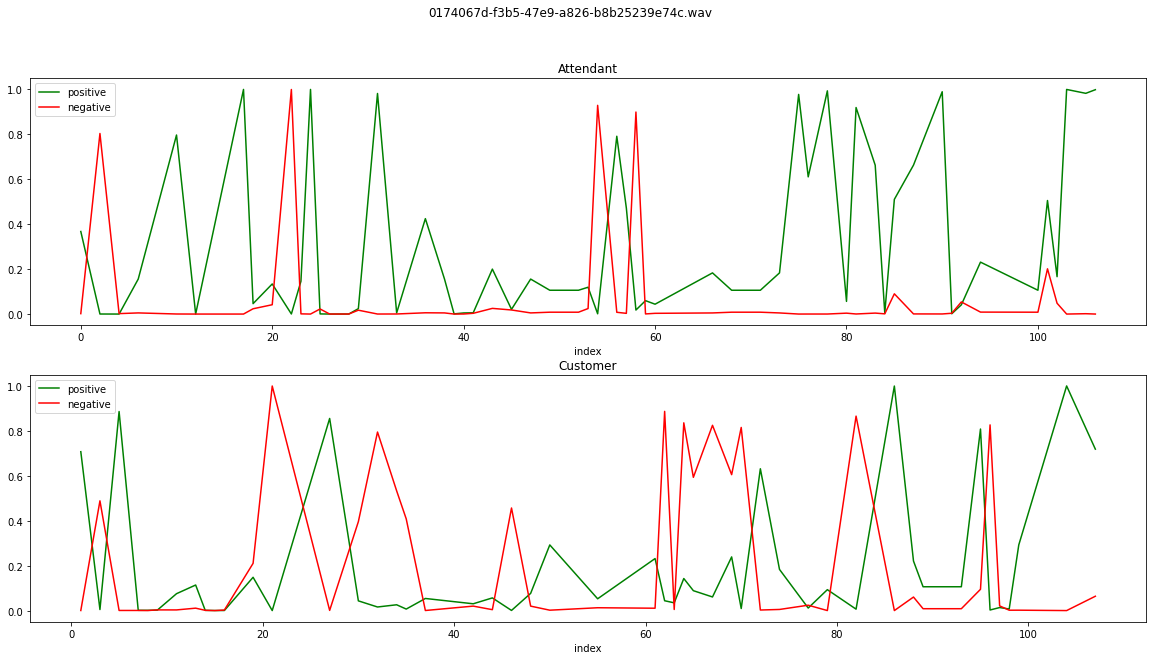

In [38]:
%matplotlib inline

show_transcript = 1

plot_sentiment(df, show_transcript);

In [39]:
show_conversation(df, show_transcript)

,recording,speaker,pred_sent,speech,positive,negative,mixed,neutral
index,,,,,,,,
0,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_0,NEUTRAL,"Gruner-und-Jahr-Kundenservice, mein Name ist Elli-Muster. Was kann ich für Sie tun,",0.367409,0.001869,0.000004,0.630718
1,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_1,POSITIVE,"er log kein Mann, aber ich möchte ganz gern das Geolino Abo von meinem Sohn Kündigung",0.707243,0.000247,0.000020,0.292490
2,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_0,NEGATIVE,Herr Kai? Das ist ja schade,0.000217,0.803585,0.000047,0.196152
3,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_1,NEUTRAL,"wir haben mittlerweile ist er 12, und da ist ein Geo Linux vielleicht doch nicht mehr ganz so, dass das passen.",0.004594,0.488475,0.000006,0.506925
4,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_0,NEUTRAL,"stimmt, dann sind sie irgendwann raus gewachsenen Herr Kay, haben die Ihre kunden oder Auftragsnummer zur Hand?",0.000034,0.001966,0.000004,0.997995
5,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_1,POSITIVE,"Ja, ich glaube, dass es diese hier probieren ist einfach. 2014",0.886044,0.000518,0.000001,0.113436
6,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_0,NEUTRAL,Ja,0.155715,0.005101,0.001404,0.837781
7,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_1,NEUTRAL,2015,0.001218,0.000542,0.000024,0.998216
8,0174067d-f3b5-47e9-a826-b8b25239e74c.wav,ch_1,NEUTRAL,2016,0.001181,0.000227,0.000039,0.998553
